In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
df = pd.read_csv(r"E:\学习\统计建模\5楼\20230912data5.csv", encoding='gbk')
df['ts'] = pd.to_datetime(df['ts'])

# 简单处理：比如 设备、区域只取一部分画图
device_sn = df['device_sn'].unique()[0]
df_device = df[df['device_sn'] == device_sn]

# 设置画图风格
sns.set(style="whitegrid")

# 创建子图
fig, axs = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle(f'Device {device_sn} 状态分析', fontsize=18)

# 电压随时间变化
axs[0, 0].plot(df_device['ts'], df_device['电压'], color='blue')
axs[0, 0].set_title('电压变化')
axs[0, 0].set_xlabel('时间')
axs[0, 0].set_ylabel('电压 (V)')

# 电流随时间变化
axs[0, 1].plot(df_device['ts'], df_device['电流'], color='green')
axs[0, 1].set_title('电流变化')
axs[0, 1].set_xlabel('时间')
axs[0, 1].set_ylabel('电流 (A)')

# 温度随时间变化
axs[1, 0].plot(df_device['ts'], df_device['温度'], color='red')
axs[1, 0].set_title('温度变化')
axs[1, 0].set_xlabel('时间')
axs[1, 0].set_ylabel('温度 (°C)')

# 湿度随时间变化
axs[1, 1].plot(df_device['ts'], df_device['湿度'], color='purple')
axs[1, 1].set_title('湿度变化')
axs[1, 1].set_xlabel('时间')
axs[1, 1].set_ylabel('湿度 (%)')

# 散点图：电压 vs 电流
axs[2, 0].scatter(df_device['电压'], df_device['电流'], alpha=0.7)
axs[2, 0].set_title('电压 vs 电流')
axs[2, 0].set_xlabel('电压 (V)')
axs[2, 0].set_ylabel('电流 (A)')

# 人体红外感应情况
sns.countplot(x='人体红外感应;1-有人；0-无人', data=df_device, ax=axs[2, 1])
axs[2, 1].set_title('人体红外感应次数')
axs[2, 1].set_xlabel('感应状态 (0=无人, 1=有人)')
axs[2, 1].set_ylabel('次数')

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 读取数据
df = pd.read_csv(r"E:\学习\统计建模\5楼\20230912data5.csv", encoding='gbk')
df['ts'] = pd.to_datetime(df['ts'])

# 基础风格
sns.set(style="whitegrid")

# 选择一个设备画时序数据
device_sn = df['device_sn'].unique()[0]
df_device = df[df['device_sn'] == device_sn]

# 1. 多指标随时间变化（折线图）
fig, axs = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle(f'Device {device_sn} 状态分析', fontsize=18)

axs[0, 0].plot(df_device['ts'], df_device['电压'], color='blue')
axs[0, 0].set_title('电压变化')
axs[0, 0].set_xlabel('时间')
axs[0, 0].set_ylabel('电压 (V)')

axs[0, 1].plot(df_device['ts'], df_device['电流'], color='green')
axs[0, 1].set_title('电流变化')
axs[0, 1].set_xlabel('时间')
axs[0, 1].set_ylabel('电流 (A)')

axs[1, 0].plot(df_device['ts'], df_device['温度'], color='red')
axs[1, 0].set_title('温度变化')
axs[1, 0].set_xlabel('时间')
axs[1, 0].set_ylabel('温度 (°C)')

axs[1, 1].plot(df_device['ts'], df_device['湿度'], color='purple')
axs[1, 1].set_title('湿度变化')
axs[1, 1].set_xlabel('时间')
axs[1, 1].set_ylabel('湿度 (%)')

axs[2, 0].scatter(df_device['电压'], df_device['电流'], alpha=0.7)
axs[2, 0].set_title('电压 vs 电流')
axs[2, 0].set_xlabel('电压 (V)')
axs[2, 0].set_ylabel('电流 (A)')

sns.countplot(x='人体红外感应;1-有人；0-无人', data=df_device, ax=axs[2, 1])
axs[2, 1].set_title('人体红外感应次数')
axs[2, 1].set_xlabel('感应状态 (0=无人, 1=有人)')
axs[2, 1].set_ylabel('次数')

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

# 2. 区域人体感应次数热力图
region_pivot = df.pivot_table(
    index='region',
    columns=df['ts'].dt.date,
    values='人体红外感应;1-有人；0-无人',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(14, 8))
sns.heatmap(region_pivot, cmap='YlGnBu', annot=True, fmt='d')
plt.title('区域-日期 人体感应次数热力图')
plt.xlabel('日期')
plt.ylabel('区域')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. 每个设备的人体感应次数条形图
device_counts = df.groupby('device_sn')['人体红外感应;1-有人；0-无人'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=device_counts.index, y=device_counts.values, palette='mako')
plt.title('各设备人体感应总次数')
plt.xlabel('设备序列号')
plt.ylabel('感应次数')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

# 1. 读取数据
input_path = r"E:\学习\统计建模\5楼\20230912data5.csv"
output_dir = r"E:\学习\统计建模\5楼\output"

os.makedirs(output_dir, exist_ok=True)

# 解决中文乱码
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取CSV
df = pd.read_csv(input_path, encoding='gbk')
df['ts'] = pd.to_datetime(df['ts'])

# 清理列名（去除奇怪符号）
rename_dict = {
    '人体红外感应;1-有人；0-无人': '人体红外感应',
    '状态;1-开；0- 关': '状态'
}
df = df.rename(columns=rename_dict)

# 2. 每个区域循环画图
regions = df['region'].dropna().unique()

for region in regions:
    df_region = df[df['region'] == region]

    # Ensure valid file name by replacing problematic characters
    safe_region_name = region.replace("'", "").replace("/", "_").replace(" ", "_")

    # ========== 图1: 多指标时间变化 ==========
    fig, axs = plt.subplots(3, 2, figsize=(18, 12))
    fig.suptitle(f'{region} 区域设备状态分析', fontsize=20)

    axs[0, 0].plot(df_region['ts'], df_region['电压'], color='blue')
    axs[0, 0].set_title('电压变化')
    axs[0, 1].plot(df_region['ts'], df_region['电流'], color='green')
    axs[0, 1].set_title('电流变化')
    axs[1, 0].plot(df_region['ts'], df_region['温度'], color='red')
    axs[1, 0].set_title('温度变化')
    axs[1, 1].plot(df_region['ts'], df_region['湿度'], color='purple')
    axs[1, 1].set_title('湿度变化')
    axs[2, 0].scatter(df_region['电压'], df_region['电流'], alpha=0.7)
    axs[2, 0].set_title('电压 vs 电流')
    sns.countplot(x='人体红外感应', data=df_region, ax=axs[2, 1])
    axs[2, 1].set_title('人体红外感应次数')

    for ax in axs.flat:
        ax.set_xlabel('')
        ax.set_ylabel('')

    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.savefig(os.path.join(output_dir, f"{safe_region_name}_图1_多指标变化.png"), dpi=300)
    plt.close()

    # ========== 图2: 区域-日期感应热力图 ========== 
    region_pivot = df_region.pivot_table(
        index='device_sn',
        columns=df_region['ts'].dt.date,
        values='人体红外感应',
        aggfunc='sum',
        fill_value=0
    )

    plt.figure(figsize=(16, 8))
    sns.heatmap(region_pivot, cmap='YlGnBu', annot=False)
    plt.title(f'{region} 区域设备-日期 人体感应热力图')
    plt.xlabel('日期')
    plt.ylabel('设备序列号')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"{safe_region_name}_图2_热力图.png"), dpi=300)
    plt.close()

    # ========== 图3: 区域内设备总感应次数 ========== 
    device_counts = df_region.groupby('device_sn')['人体红外感应'].sum().sort_values(ascending=False)

    plt.figure(figsize=(14, 6))
    sns.barplot(x=device_counts.index, y=device_counts.values, palette='rocket')
    plt.title(f'{region} 区域各设备人体感应总次数')
    plt.xlabel('设备序列号')
    plt.ylabel('感应次数')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"{safe_region_name}_图3_设备感应次数.png"), dpi=300)
    plt.close()

    # ========== 图4: 人体感应按小时变化趋势 ========== 
    df_region['hour'] = df_region['ts'].dt.hour
    hour_counts = df_region.groupby('hour')['人体红外感应'].sum()

    plt.figure(figsize=(12, 5))
    sns.lineplot(x=hour_counts.index, y=hour_counts.values, marker='o')
    plt.title(f'{region} 区域人体感应随小时变化趋势')
    plt.xlabel('小时')
    plt.ylabel('感应次数')
    plt.xticks(range(0, 24))
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"{safe_region_name}_图4_小时变化趋势.png"), dpi=300)
    plt.close()

# 3. 整体跨区域对比（选做）
# 跨区域感应总次数
region_counts = df.groupby('region')['人体红外感应'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='coolwarm')
plt.title('各区域人体感应总次数对比')
plt.xlabel('区域')
plt.ylabel('感应总次数')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, f"整体_各区域感应总次数对比.png"), dpi=300)
plt.close()

print("所有图表已成功保存！")


C:\Users\jimta\AppData\Local\Temp\ipykernel_29984\107873353.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=device_counts.index, y=device_counts.values, palette='rocket')
C:\Users\jimta\AppData\Local\Temp\ipykernel_29984\107873353.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['hour'] = df_region['ts'].dt.hour
C:\Users\jimta\AppData\Local\Temp\ipykernel_29984\107873353.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=devi

所有图表已成功保存！


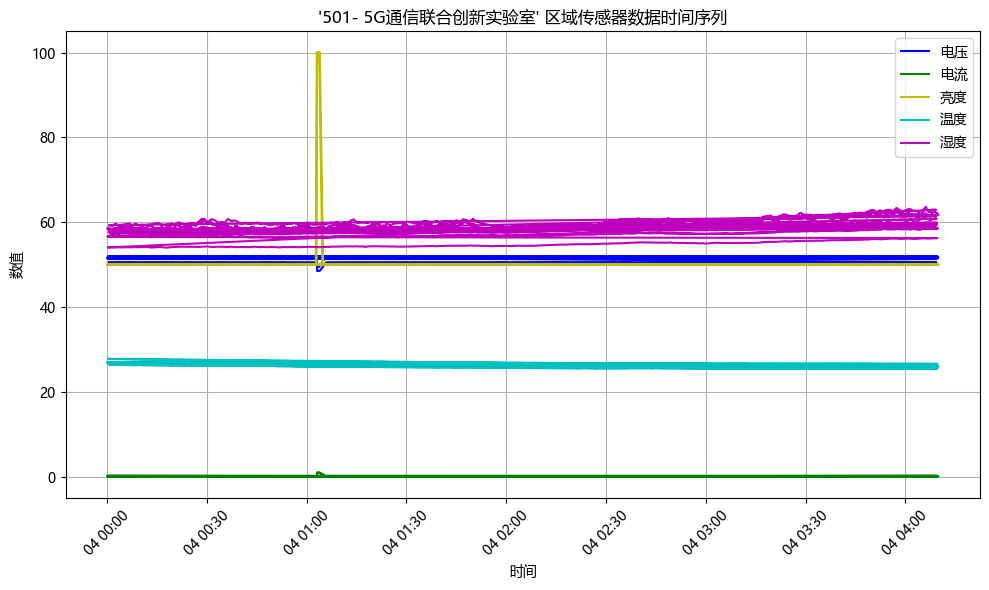

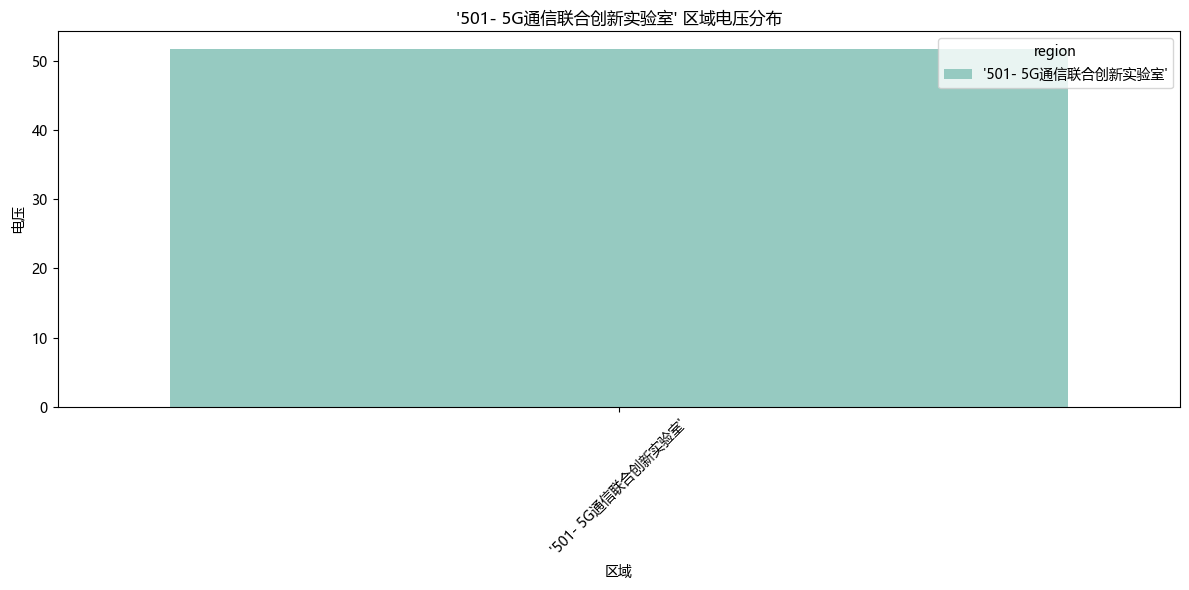

In [ ]:
import pandas as pd

# 尝试使用不同的编码加载 CSV 数据
df = pd.read_csv(r"E:\学习\统计建模\test.csv", encoding='GBK') 
df['ts'] = pd.to_datetime(df['ts'])  # 转换时间格式

# 获取唯一的区域
regions = df['region'].unique()

# 定义一个函数来绘制每个区域的图形
def generate_plots_for_region(region):
    # 过滤特定区域的数据
    region_data = df[df['region'] == region]

    # 1. 时间序列折线图
    plt.figure(figsize=(10, 6))
    plt.plot(region_data['ts'], region_data['电压'], label="电压", color='b')
    plt.plot(region_data['ts'], region_data['电流'], label="电流", color='g')

    plt.plot(region_data['ts'], region_data['亮度'], label="亮度", color='y')
    plt.plot(region_data['ts'], region_data['温度'], label="温度", color='c')
    plt.plot(region_data['ts'], region_data['湿度'], label="湿度", color='m')
    plt.xlabel('时间')
    plt.ylabel('数值')
    plt.legend()
    plt.title(f'{region} 区域传感器数据时间序列')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 遍历每个区域生成图形
for region in regions:
    generate_plots_for_region(region)


Index(['ts', 'device_sn', 'region', '电压', '电流', '色温', '亮度', '温度', '湿度',
       '人体红外感应;1-有人；0-无人', '状态;1-开；0- 关'],
      dtype='object')


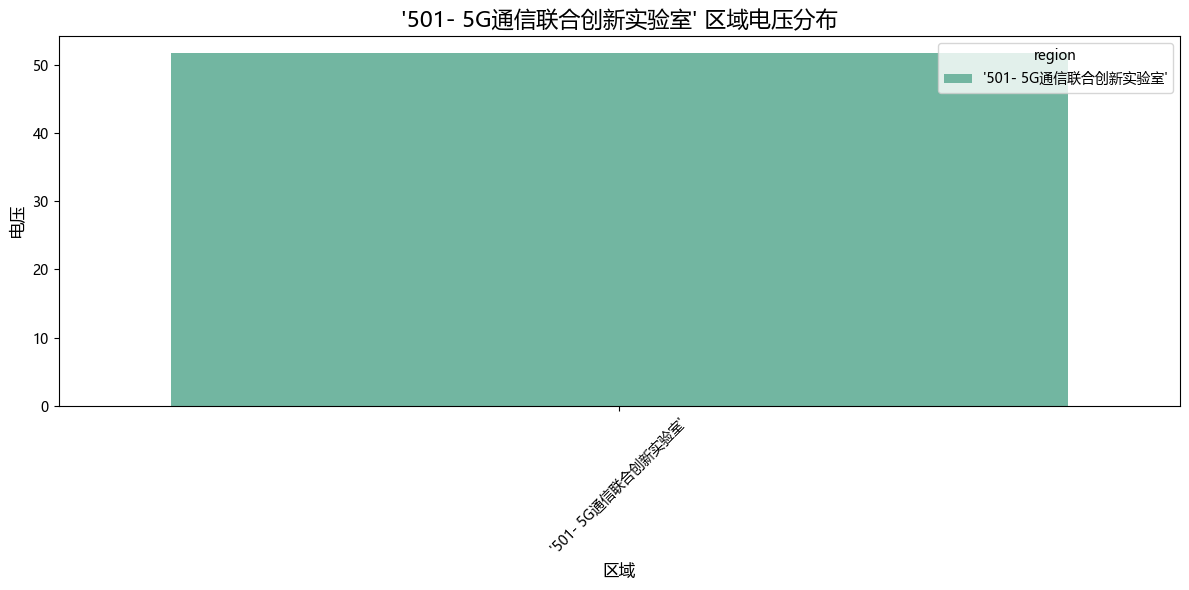

C:\Users\jimta\AppData\Local\Temp\ipykernel_38256\229909732.py:98: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\jimta\AppData\Local\Temp\ipykernel_38256\229909732.py:99: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\jimta\AppData\Local\Temp\ipykernel_38256\229909732.py:100: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\jimta\AppData\Local\Temp\ipykernel_38256\229909732.py:100: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



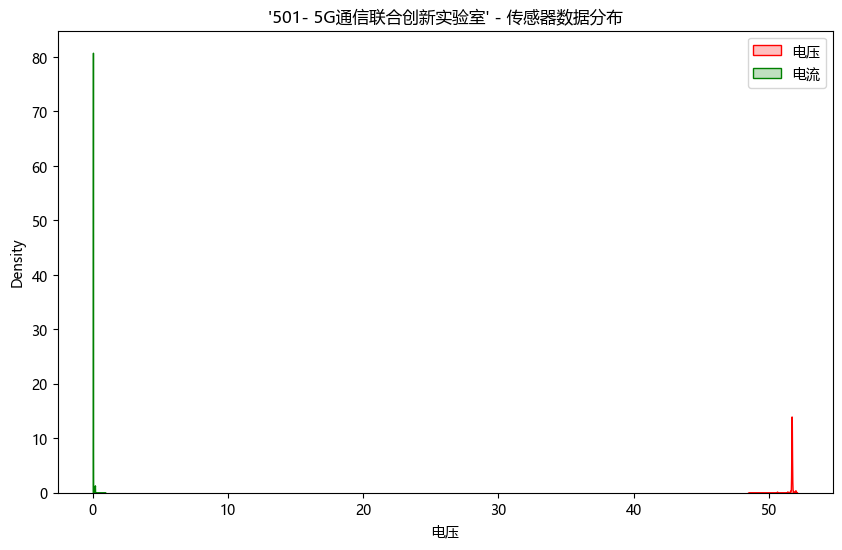

In [11]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# 加载数据
df = pd.read_csv(r"E:\学习\统计建模\test.csv", encoding='GBK')  
df.columns = df.columns.str.strip()  # 去除列名的空格
df['ts'] = pd.to_datetime(df['ts'])  # 转换时间格式

# 查看列名
print(df.columns)

# 获取唯一的区域
regions = df['region'].unique()

# 1. 交互式时间序列图 (Interactive Time Series Plot with Plotly)
def plot_interactive_timeseries(region):
    region_data = df[df['region'] == region]
    
    fig = px.line(region_data, x='ts', y=['电压', '电流', '亮度', '温度', '湿度'],
                  title=f'{region} 区域传感器数据时间序列',
                  labels={'ts': '时间', 'value': '数值'},
                  line_shape='linear')
    fig.update_layout(title=f'{region} 区域传感器数据时间序列', xaxis_title='时间', yaxis_title='数值',
                      template='plotly_dark')  # 使用暗色主题
    fig.show()

# 2. 交互式热力图 (Interactive Heatmap with Plotly)
def plot_heatmap(region):
    region_data = df[df['region'] == region]
    
    # 创建数据透视表
    pivot_data = region_data.pivot_table(values='电压', index='ts', columns='region')
    
    fig = px.imshow(pivot_data, title=f'{region} 区域电压热力图', 
                    labels={'x': '时间', 'y': '区域'},
                    color_continuous_scale='Viridis')
    fig.update_layout(template='plotly_dark')
    fig.show()

# 3. 3D 散点图 (3D Scatter Plot with Plotly)
def plot_3d_scatter(region):
    region_data = df[df['region'] == region]
    
    fig = px.scatter_3d(region_data, x='电压', y='电流', z='色温',
                        color='湿度', size='亮度', opacity=0.8,
                        title=f'{region} 区域传感器数据 3D 散点图',
                        labels={'电压': 'Voltage', '电流': 'Current', '色温': 'Color Temperature'})
    fig.update_layout(template='plotly_dark')
    fig.show()

# 4. 高级柱状图 (Advanced Grouped Bar Plot with Seaborn)
def plot_grouped_bar(region):
    region_data = df[df['region'] == region]
    
    # Matplotlib 中文显示配置
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 设置字体为 Microsoft YaHei，支持中文
    plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

    plt.figure(figsize=(12, 6))
    sns.barplot(x='region', y='电压', data=region_data, hue='region', palette="Set2")
    plt.title(f'{region} 区域电压分布', fontsize=16)
    plt.xlabel('区域', fontsize=12)
    plt.ylabel('电压', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


    # 3. 桑基图
    labels = ["无人", "有人", "关", "开"]
    sources = [0, 1, 1, 2]  # 示例数据流动源
    targets = [2, 3, 0, 3]  # 示例数据流动目标
    values = [10, 20, 30, 40]  # 示例数据流的大小

    fig3 = go.Figure(go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=labels
        ),
        link=dict(
            source=sources,
            target=targets,
            value=values
        )
    ))

    fig3.update_layout(title=f"{region_data['region'].iloc[0]} - 桑基图", template="plotly_dark")
    fig3.show()

    # 4. 密度图
    plt.figure(figsize=(10, 6))
    sns.kdeplot(region_data['电压'], shade=True, color="r", label="电压")
    sns.kdeplot(region_data['电流'], shade=True, color="g", label="电流")
    sns.kdeplot(region_data['色温'], shade=True, color="b", label="色温")
    plt.title(f"{region_data['region'].iloc[0]} - 传感器数据分布")
    plt.legend()
    plt.show()




# 选择区域并生成图形
for region in regions:
    # 绘制交互式时间序列图
    plot_interactive_timeseries(region)
    
    # 绘制交互式热力图
    plot_heatmap(region)
    
    # 绘制3D散点图
    plot_3d_scatter(region)
    
    # 绘制分组柱状图
    plot_grouped_bar(region)
